In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("TAIPEI_diabetes.csv")  # Make sure the dataset is in the correct directory

# Check if df is properly loaded
print(df.head())  # Display the first few rows to confirm

# Define features (X) and scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Scale all features except Outcome

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [3]:
X = X_scaled
y = df.iloc[:, -1]  # Outcome column

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # ✅ Import train_test_split

# Load dataset
df = pd.read_csv("TAIPEI_diabetes.csv")  # Ensure the file is in the correct directory

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2014
           1       0.92      0.87      0.89       986

    accuracy                           0.93      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.93      0.93      0.93      3000

Model Accuracy: 93.10%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2014
           1       0.92      0.87      0.89       986

    accuracy                           0.93      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.93      0.93      0.93      3000



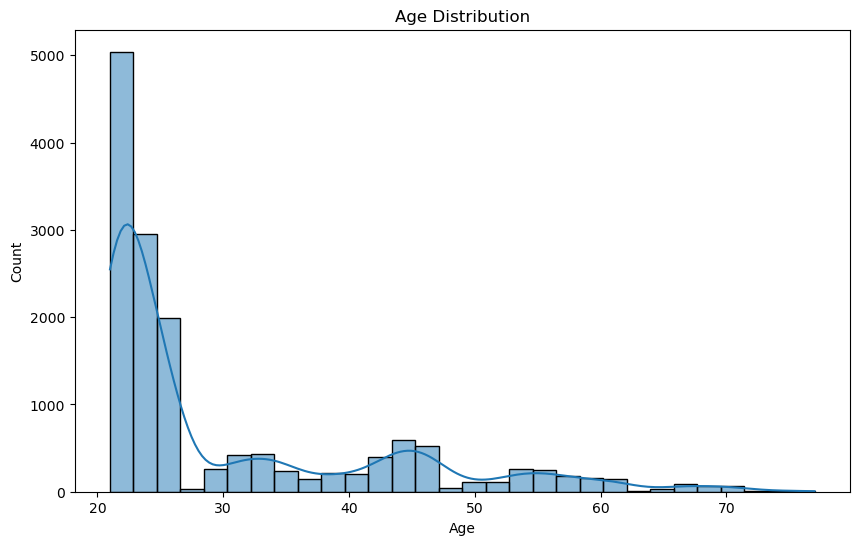

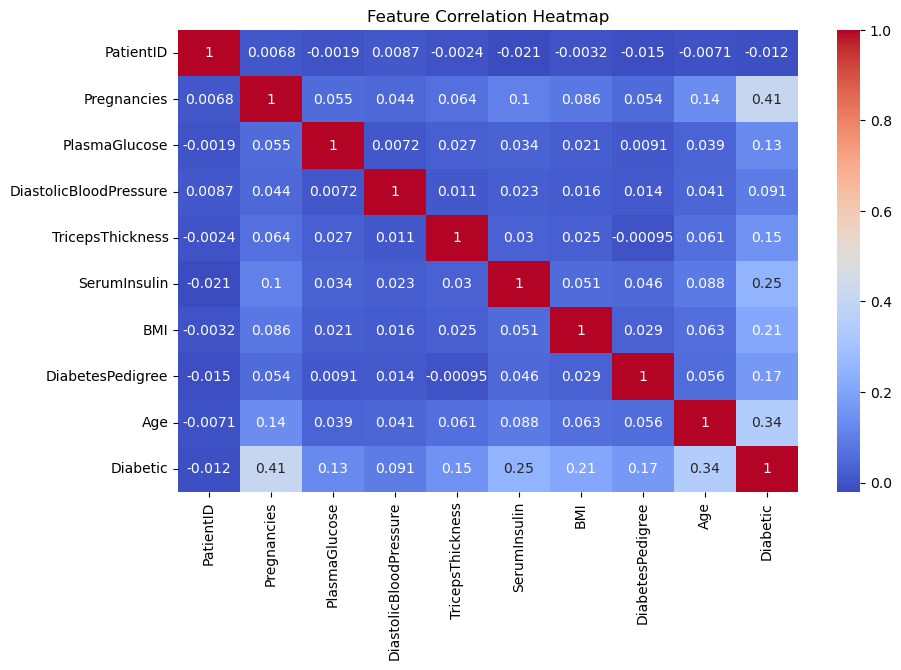

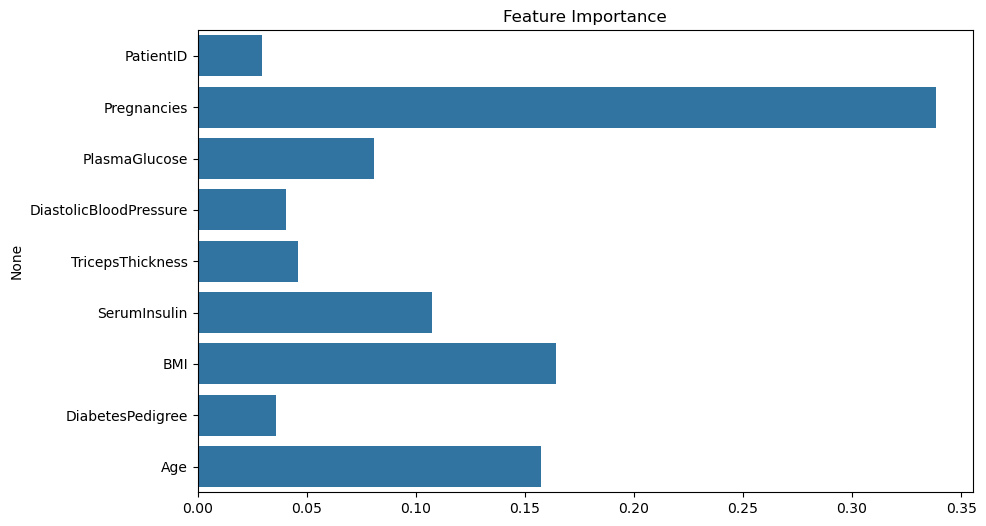

In [10]:
import pandas as pd
import joblib  # ✅ Import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("TAIPEI_diabetes.csv")

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save trained model and scaler
joblib.dump(model, "random_forest_model.pkl")  # ✅ Save model
joblib.dump(scaler, "scaler.pkl")  # ✅ Save scaler

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
importances = model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()